In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import cv2
import os
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import pandas as pd

In [2]:
created_time = int(time.time())
train_dir = "./dataset/train"
test_dir = "./dataset/test"
train_list = os.listdir(train_dir)
test_list = os.listdir(test_dir)
label = train_list
model_dir = f'model/{created_time}'
os.makedirs(f'model/{created_time}')

In [3]:
X_train = []
Y_train = []
X_test = []
Y_test= []
for i in train_list:
    img_list = os.listdir(train_dir + "/" + i)
    for j in img_list:
        img = cv2.imread(train_dir + "/" + i + '/' + j)
        X_train.append(img)

X_train = np.array(X_train)/255
print(np.shape(X_train))

for i in test_list:
    img_list = os.listdir(test_dir + "/" + i)
    for j in img_list:
        img = cv2.imread(test_dir + '/' + i + '/' + j)
        X_test.append(img)
        
X_test = np.array(X_test)/255
print(np.shape(X_test))


for i in range(5):
    for j in range(450):
        Y_train.append(i)
Y_train = np.array(Y_train)
Y_train = to_categorical(Y_train, num_classes = 5)



for i in range(5):
    for j in range(50):
        Y_test.append(i)
Y_test = np.array(Y_test)
Y_test = to_categorical(Y_test, num_classes = 5)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1111, random_state=2022)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape, Y_test.shape)

(2250, 32, 32, 3)
(250, 32, 32, 3)
(2000, 32, 32, 3) (2000, 5) (250, 32, 32, 3) (250, 5) (250, 32, 32, 3) (250, 5)


In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),input_shape = (32,32,3),
activation = 'relu', padding='same'))
model.add(Conv2D(32,(3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu',padding='same'))
model.add(Conv2D(64,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

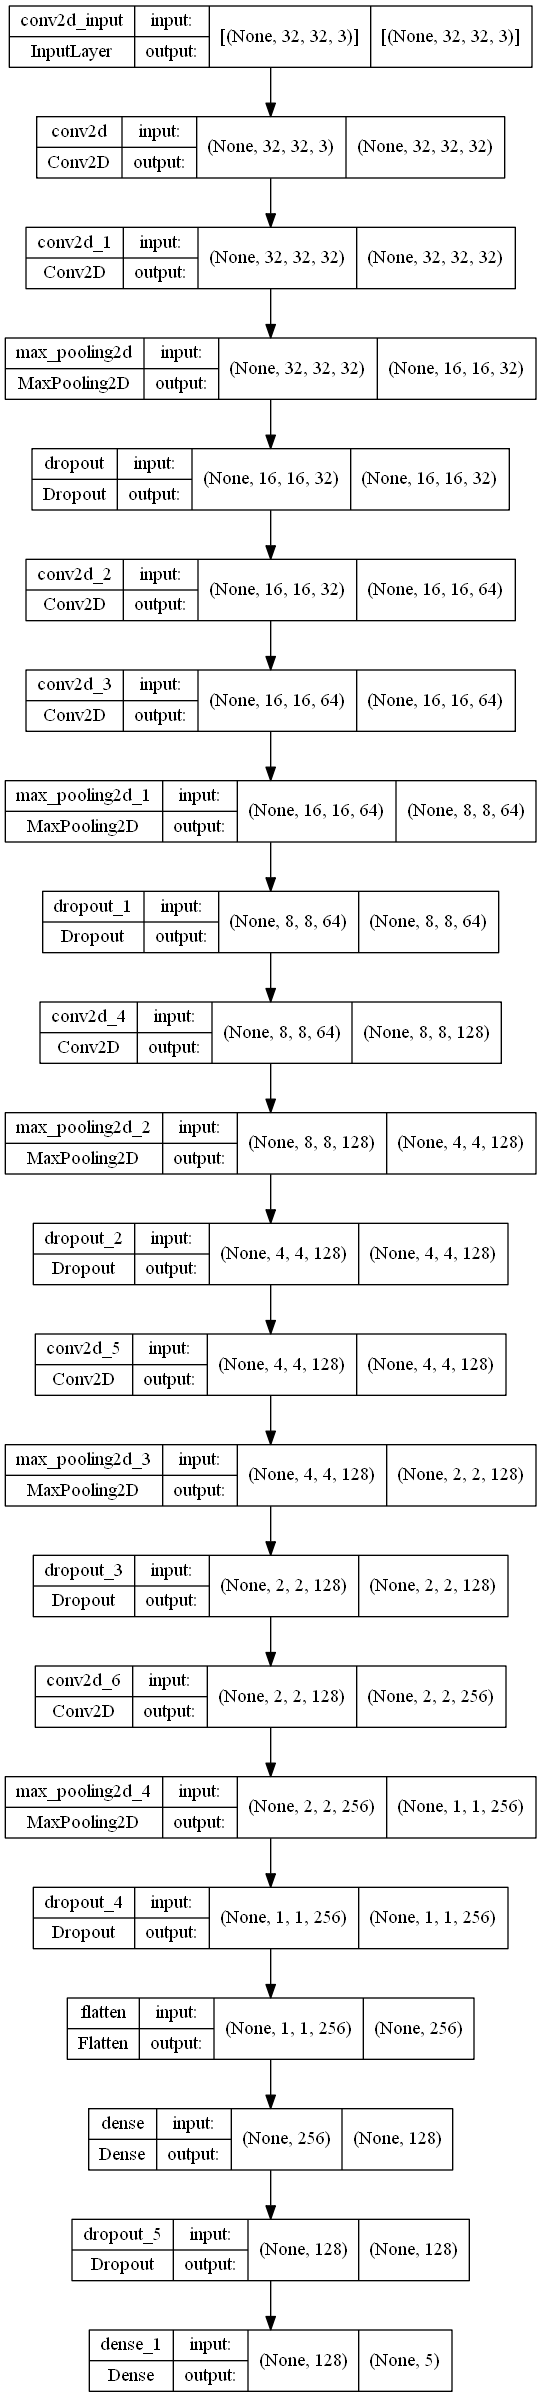

In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate=0.0002),
             metrics=['accuracy', tf.keras.metrics.AUC()]
             )
             
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)
model.summary()
plot_model(model, show_shapes=True)

In [6]:
history = model.fit(X_train, Y_train,validation_data = [X_val, Y_val],epochs = 250, batch_size = 128,callbacks=[es,tf.keras.callbacks.CSVLogger(f'{model_dir}/log.csv')])

Epoch 1/250
16/16 [==============================] - 7s 402ms/step - loss: 1.6051 - accuracy: 0.2085 - auc: 0.5279 - val_loss: 1.5952 - val_accuracy: 0.3160 - val_auc: 0.6426
Epoch 2/250
16/16 [==============================] - 6s 369ms/step - loss: 1.5268 - accuracy: 0.2920 - auc: 0.6186 - val_loss: 1.4080 - val_accuracy: 0.4280 - val_auc: 0.7467
Epoch 3/250
16/16 [==============================] - 6s 380ms/step - loss: 1.3083 - accuracy: 0.3960 - auc: 0.7445 - val_loss: 1.2763 - val_accuracy: 0.4440 - val_auc: 0.7733
Epoch 4/250
16/16 [==============================] - 6s 378ms/step - loss: 1.2534 - accuracy: 0.4350 - auc: 0.7729 - val_loss: 1.2335 - val_accuracy: 0.4560 - val_auc: 0.7866
Epoch 5/250
16/16 [==============================] - 6s 382ms/step - loss: 1.2058 - accuracy: 0.4530 - auc: 0.7924 - val_loss: 1.2208 - val_accuracy: 0.4760 - val_auc: 0.7920
Epoch 6/250
16/16 [==============================] - 6s 363ms/step - loss: 1.2089 - accuracy: 0.4700 - auc: 0.7944 - val_loss

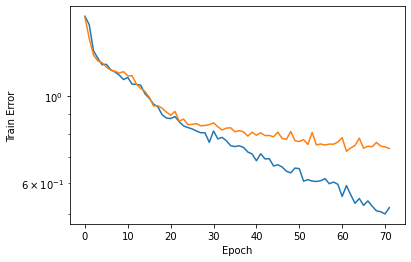

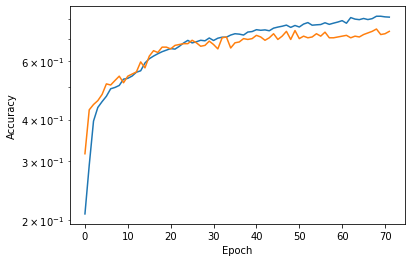

In [7]:
plt.figure()
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.savefig(f"{model_dir}/train_error.png")
plt.figure()
pd.Series(history.history['accuracy']).plot(logy=True)
pd.Series(history.history['val_accuracy']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig(f"{model_dir}/accuracy.png")
plt.show()

In [8]:
test_result = model.evaluate(X_test,Y_test)

8/8 [==============================] - 0s 31ms/step - loss: 0.5821 - accuracy: 0.8000 - auc: 0.9569


In [9]:
model.save(f"{model_dir}/model_[{test_result[1]:.2f}].h5")

[6.3779493e-07 9.9984574e-01 1.6069196e-05 1.3468850e-04 2.8615189e-06]
dolphin
99.98%


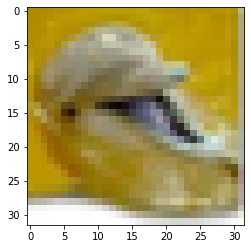

In [10]:
ani_list = ['chimpanzee', 'dolphin','elephant','kangaroo','lion']
model = load_model('model/1654348144/model_[0.83].h5')
img_num = 70
plt.imshow(X_test[img_num])
predict = model.predict(X_test)[img_num]
print(predict)
print(ani_list[np.argmax(predict)])
print(f"{np.max(predict)*100:.2f}%")
